<a href="https://colab.research.google.com/github/Dinaabdalla2018/Arabic-Dialect-Identification/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model consists of two main components: BiLSTM and a self Attention mechanism

####Libraries__________

In [4]:
from data_ import *        #call the file python data_ (contain All function related with preprocessing dataset)
from keras.layers import *
from keras.models import *
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###Call data

In [ ]:
data = data_("dialect_dataset.csv",190280)                                # Call the dataset with 190280 rows randoms from total data
data.Call_API("https://recruitment.aimtechnologies.co/ai-tasks",190,280)  #  text from Api_link with 190 thousand and 280
data.Transform_data('DL') # DL To Encode Y                                                   # transform data into number of vector

In [ ]:
data.Split_Data()  # Split data into train&test

In [ ]:
data.save_trans_models('feature.pkl', 'tfidftransformer.pkl')

##Define Model 
##Self Attention mechanism

In [ ]:
class attention(Layer):
    def __init__(self, return_sequences=False):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1],1),initializer="normal")
        self.b = self.add_weight(name="att_bias",   shape=(input_shape[1],1), initializer="zeros")
        super(attention,self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        return K.sum(output, axis=1)

##Build ALL Model with 
* Embeding Layer
* Bidirection LSTM
* Softmax (LastLayer)

In [ ]:
model = Sequential()
model.add(Embedding(data.xtrain.shape[0], 128, input_length=data.xtrain.shape[1]))
model.add(Bidirectional(LSTM(90, return_sequences=True)))
model.add(attention())
model.add(Dropout(0.2))
model.add(Dense(data.num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 420, 128)          19484672  
                                                                 
 bidirectional_2 (Bidirectio  (None, 420, 180)         157680    
 nal)                                                            
                                                                 
 attention_2 (attention)     (None, 180)               600       
                                                                 
 dropout_2 (Dropout)         (None, 180)               0         
                                                                 
 dense_2 (Dense)             (None, 18)                3258      
                                                                 
Total params: 19,646,210
Trainable params: 19,646,210
Non-trainable params: 0
__________________________________________

##Train Model

In [ ]:
history = model.fit(data.xtrain, data.ytrain, batch_size = 10, epochs = 2, validation_data=[data.xtest, data.ytest])
#Save Model as .h1
model.save('my_model.h1')
#Print Loss of train - test
print(history.history['loss'])
#Print Accuracy of train - test
print(history.history['accuracy']) 

Epoch 1/2
15223/15223 [==============================] - 9337s 613ms/step - loss: 2.7749 - accuracy: 0.1251 - val_loss: 2.7720 - val_accuracy: 0.1247
Epoch 2/2
15223/15223 [==============================] - 9748s 640ms/step - loss: 2.7722 - accuracy: 0.1254 - val_loss: 2.7701 - val_accuracy: 0.1247


INFO:tensorflow:Assets written to: my_model.h1/assets


INFO:tensorflow:Assets written to: my_model.h1/assets


[2.774913787841797, 2.772219181060791]
[0.12507225573062897, 0.12538759410381317]


###Evaluation Model

In [ ]:
pred = model.predict(data.xtest)

In [ ]:
y_pred = np.array([np.argmax(p) for p in pred]) #Convert into numbers of predict class 

In [ ]:
ytest = np.array([np.argmax(p) for p in data.ytest])

In [ ]:
print(classification_report(ytest, y_pred))
print("Accuracy: \n", accuracy_score(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2154
           1       0.00      0.00      0.00      2133
           2       0.00      0.00      0.00      1367
           3       0.12      1.00      0.22      4745
           4       0.00      0.00      0.00      1264
           5       0.00      0.00      0.00      2271
           6       0.00      0.00      0.00      3437
           7       0.00      0.00      0.00      2390
           8       0.00      0.00      0.00      3021
           9       0.00      0.00      0.00       936
          10       0.00      0.00      0.00      1547
          11       0.00      0.00      0.00      3721
          12       0.00      0.00      0.00      2655
          13       0.00      0.00      0.00      2231
          14       0.00      0.00      0.00      1238
          15       0.00      0.00      0.00      1369
          16       0.00      0.00      0.00       753
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


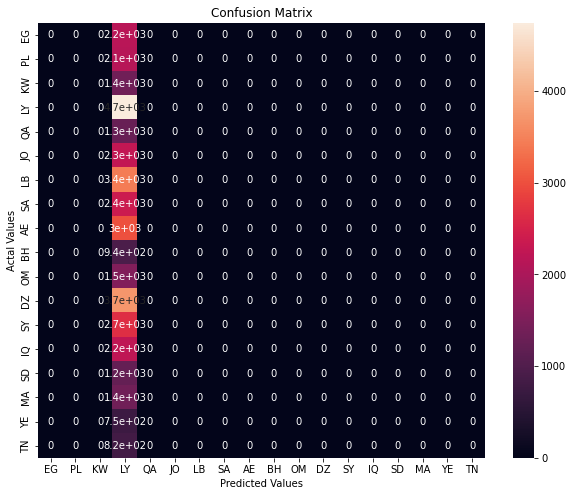

In [ ]:
class_label = ['EG','PL','KW','LY','QA','JO','LB','SA','AE','BH','OM','DZ','SY','IQ','SD','MA','YE','TN']
conf_mat    = confusion_matrix(ytest, y_pred)
df          = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
plt.figure(figsize=(10,8))
sns.heatmap(df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Text(0, 0.5, 'Frequency')

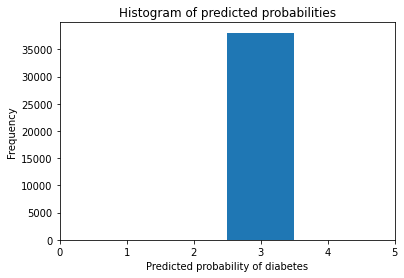

In [ ]:
plt.hist(y_pred, bins=1)
# x-axis limit from 0 to 1
plt.xlim(0,5)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')